### <u>PROBLEM STATEMENT</u>:
#### <center>"Analyzing Viewing Patterns: Movies & Shows"</center>

The project aims to address the challenge of understanding and analyzing the patterns of extensive movie and TV show consumption, as indicated by a collection of sticky notes with viewing recommendations. The primary objectives are to determine the sources of time for such extensive viewing, the content that was consumed, and the methods used to achieve this level of consumption.

In [1]:
#Loading the required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
import ipywidgets as widgets
from IPython import display

In [2]:
#loading the movie analysis dataset
df = pd.read_excel("C:\\Users\\sony\\Desktop\\2023\\Pandas Projects\\movie_data.xlsx")

In [3]:
#Displaying all the rows
pd.set_option("display.max_rows", 269)

In [4]:
#Having a glance at the first five records of the movie dataset
df.head(5)

,ID,Titles,Release Year,Watch Year,Genre,Rating,Platform,Episodes,Cast,Duration,Duration in Mins,Type,Country of origin
0,1,Bhagg Beanie Bhagg,2020,2020,Romantic-comedy,3.6,Netflix,6.0,Swara Bhaskar,29 minutes,29 minutes,TV Series,India
1,2,Masaba Masaba S1,2020,2020,"Biography,Drama",6.7,Netflix,13.0,"Masaba Gupta, Neena Gupta",50 minutes,50 minutes,TV Series,India
2,3,Mismatched S1,2020,2020,"Drama,Romance",5.8,Netflix,14.0,"Prajakta Koli, Rohit Saraf",30 minutes,30 minutes,TV Series,India
3,4,Fabulous Lives Of Bollywood Wives S1,2020,2020,"Documentary,Reality-TV",4.3,Netflix,8.0,"Neelam Kothari, Maheep Kapoor, Karan Johar,See...",35 minutes,35 minutes,TV Series,India
4,5,Fabulous Lives Of Bollywood Wives S2,2022,2022,"Documentary,Reality-TV",4.3,Netflix,8.0,"Neelam Kothari, Maheep Kapoor, Karan Johar,See...",35 minutes,35 minutes,TV Series,India


# <center><u>DATA INFORMATION</u></center>

### Exploring Dataset Dimensions: Rows and Columns

In [5]:
df.shape

(295, 13)

### Dataset Columns: An Overview

In [6]:
df.columns

Index(['ID', 'Titles', 'Release Year', 'Watch Year', 'Genre', 'Rating',
       'Platform', 'Episodes', 'Cast', 'Duration', 'Duration in Mins', 'Type',
       'Country of origin'],
      dtype='object')

### Columns Containing Null Values: Count and Data Type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 295 non-null    int64  
 1   Titles             295 non-null    object 
 2   Release Year       295 non-null    int64  
 3   Watch Year         295 non-null    int64  
 4   Genre              295 non-null    object 
 5   Rating             295 non-null    float64
 6   Platform           295 non-null    object 
 7   Episodes           135 non-null    float64
 8   Cast               295 non-null    object 
 9   Duration           295 non-null    object 
 10  Duration in Mins   295 non-null    object 
 11  Type               295 non-null    object 
 12  Country of origin  295 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 30.1+ KB


### Evaluation of Null Values in Each Column

In [8]:
df.isnull().sum()

ID                     0
Titles                 0
Release Year           0
Watch Year             0
Genre                  0
Rating                 0
Platform               0
Episodes             160
Cast                   0
Duration               0
Duration in Mins       0
Type                   0
Country of origin      0
dtype: int64

### Elimination of Duplicate Values in Each Column

In [9]:
df.loc[df["Titles"].duplicated(),:]
df.drop_duplicates().head(5)

,ID,Titles,Release Year,Watch Year,Genre,Rating,Platform,Episodes,Cast,Duration,Duration in Mins,Type,Country of origin
0,1,Bhagg Beanie Bhagg,2020,2020,Romantic-comedy,3.6,Netflix,6.0,Swara Bhaskar,29 minutes,29 minutes,TV Series,India
1,2,Masaba Masaba S1,2020,2020,"Biography,Drama",6.7,Netflix,13.0,"Masaba Gupta, Neena Gupta",50 minutes,50 minutes,TV Series,India
2,3,Mismatched S1,2020,2020,"Drama,Romance",5.8,Netflix,14.0,"Prajakta Koli, Rohit Saraf",30 minutes,30 minutes,TV Series,India
3,4,Fabulous Lives Of Bollywood Wives S1,2020,2020,"Documentary,Reality-TV",4.3,Netflix,8.0,"Neelam Kothari, Maheep Kapoor, Karan Johar,See...",35 minutes,35 minutes,TV Series,India
4,5,Fabulous Lives Of Bollywood Wives S2,2022,2022,"Documentary,Reality-TV",4.3,Netflix,8.0,"Neelam Kothari, Maheep Kapoor, Karan Johar,See...",35 minutes,35 minutes,TV Series,India


# <center><u>STATISTICAL ANALYSIS</u></center>

In [10]:
df.describe().astype(int) #round()

,ID,Release Year,Watch Year,Rating,Episodes
count,295,295,295,295,135
mean,148,2018,2021,6,11
std,85,4,1,1,5
min,1,1994,2015,2,3
25%,74,2017,2020,6,8
50%,148,2019,2021,7,10
75%,221,2021,2023,7,15
max,295,2023,2023,9,24


# <u><center>THOROUGH DATA ANALYSIS</center></u>

## 1. Visualization of Content Types in the Dataset

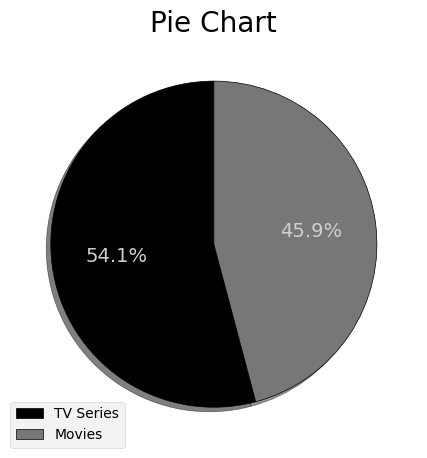

In [11]:
# Set the style
plt.style.use("fivethirtyeight")

# Get the data
slices = df.loc[(df["Type"] == 'Movie') | (df["Type"] == 'TV Series'), 'Type'].value_counts()
labels = ["TV Series", "Movies"]
colors = ['black', '#777777']

# Create the plot
fig, ax = plt.subplots()
ax.pie(slices, autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={'edgecolor': 'black'}, colors=colors, textprops={'color': '#CFCFCF'})
ax.legend(labels, loc=(0.00, 0.001), fontsize="10")

# Set the title and remove the background color
ax.set_title("Pie Chart")
fig.patch.set_facecolor('none')

# Show the plot
plt.tight_layout()
plt.show()

**Movies** constitute **45.9%** of the total content, while the remaining **54.1%** of the content pertains to **TV Shows.**

## 2. Top 10 Movies with the Highest Ratings

In [12]:
df[["Rating", "Titles"]].sort_values(by = "Rating", ascending = False).iloc[0:9].set_index("Titles")

,Rating
Titles,
Doctors,9.4
Sherlock S1,9.1
Sherlock S2,9.1
Sherlock S3,9.1
Sherlock S4,9.1
Crash Landing On You,8.7
Stranger Things S4,8.7
Stranger Things S2,8.7
Stranger Things S1,8.7


This list showcases the top 10 titles based on their respective ratings, with "**Doctors**" leading the rankings with a rating of **9.4**, followed by a group of titles from the "**Sherlock**" series with ratings of **9.1** each.

## 3. Expansion of Content Over the Years

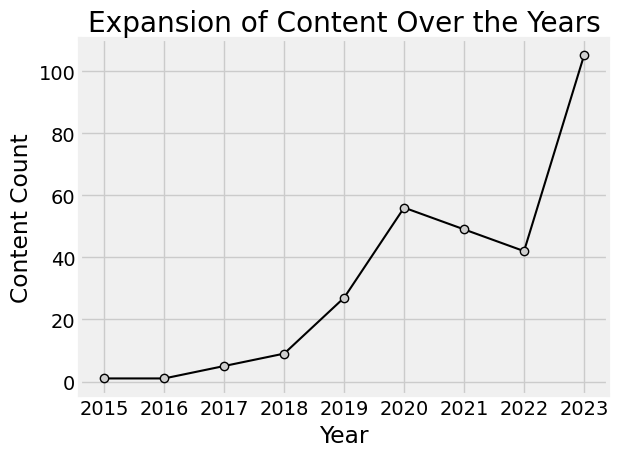

In [13]:
# Get the data
content_count = list(df.groupby("Watch Year")["Titles"].count())
year = list(df.groupby("Watch Year"))
year1 = []
for i in range(len(year)):
    year1.append(year[i][0])

# Create the plot
fig, ax = plt.subplots()
ax.plot(year1, content_count, color='black', linewidth=1.5, marker='o', markerfacecolor='#CFCFCF')
ax.set_xlabel("Year")
ax.set_ylabel("Content Count")
ax.set_title("Expansion of Content Over the Years")

# Remove the background color
fig.patch.set_facecolor('none')

# Show the plot
plt.tight_layout()
plt.show()

Content expansion initiated in **2016**, and it's noteworthy that **2023** has seen a significantly greater increase in content compared to all previous years.

## 4. Average Duration of Movies/Shows by Year

In [14]:
result = df.assign(Duration=pd.to_numeric(df["Duration in Mins"].astype(str).str.split().str[0])).groupby("Watch Year")["Duration"].mean().round().astype("int").reset_index()
result

,Watch Year,Duration
0,2015,158
1,2016,42
2,2017,47
3,2018,60
4,2019,66
5,2020,68
6,2021,70
7,2022,81
8,2023,103


This data underscores the fluctuating average durations over the specified years, with "**2015**" registering the highest average duration of **158 minutes.**

## 5. Top 10 Most Watched Actors

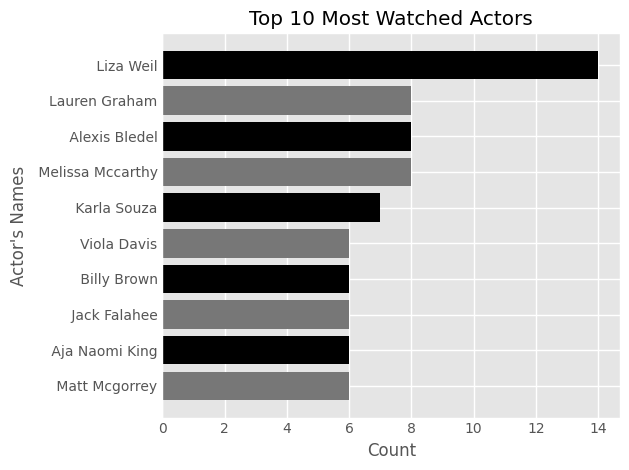

In [15]:
counter = Counter()
for i in df["Cast"]:
    counter.update(i.title().split(","))

Cast = []
counts = []
for key,value in sorted(counter.items(), key = lambda x: x[1], reverse = True):
    Cast.append(key)
    counts.append(value)
Cast1 = []
count1 = []

for i in range(10):
    Cast1.append(Cast[i]) 
    count1.append(counts[i])
    
plt.style.use('ggplot')
bar_colors=['black','#777777']
plt.barh(Cast1, count1, color=bar_colors)

plt.title("Top 10 Most Watched Actors")
plt.ylabel("Actor's Names")
plt.xlabel("Count")

plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

"**Liza Weil**" stands as the most extensively watched actor, followed by "**Lauren Graham**", "**Alexis Bledel**", and "**Melissa McCarthy**", who share an equal watch count. Subsequently, "**Karla Souza**" holds the subsequent position, followed by others in the ranking.

## 6. Title and Duration of Lengthy Movie/Show

In [16]:
df["Duration in Mins"] = df["Duration in Mins"].astype(str)
df["Duration in Mins"] = df["Duration in Mins"].str.split().str[0].astype(int)
max_row = df.loc[df["Duration in Mins"].idxmax()]
print("Title:", max_row["Titles"])
print("Duration in Mins:", max_row["Duration in Mins"])

Title: Oppenheimer
Duration in Mins: 180


"**Oppenheimer**" holds a lengthy runtime of **180 minutes.**

## 7. Titles of Movies/Shows with Durations ≥ 150 Minutes(2.5 hours)

In [17]:
duration = df["Duration in Mins"].astype("int")
df.loc[duration >= 150 ,["Titles","Duration in Mins"]].set_index("Titles").sort_values(by = "Duration in Mins", ascending = False)

,Duration in Mins
Titles,
Oppenheimer,180
Jersey,170
Interstellar,169
83,160
Laal Singh Chaddha,159
Dilwale,158
Dhan Dhana Dhan Goal,156
Mubarakan,156
Shabaash Mithu,156


The list showcases movies with extended runtimes, including "**Oppenheimer**" (180 mins), "**Jersey**" (170 mins), and "**Interstellar**" (169 mins). This suggests a trend toward immersive and substantial cinematic experiences across diverse genres.

## 8. Movie Trends: 1990-2014 & 2015-2023

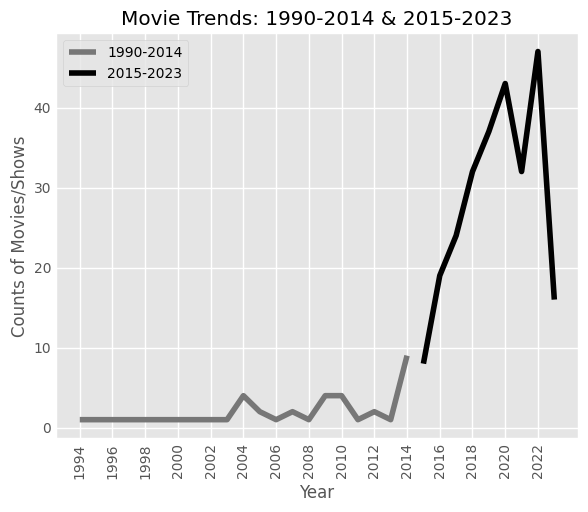

In [18]:
extracted_year_14 = df.loc[(df["Release Year"] >= 1990) & (df["Release Year"] <= 2014)]["Release Year"]
result1 = df.groupby(extracted_year_14)["Titles"].count().reset_index()

extracted_year_23 = df.loc[(df["Release Year"] >= 2015) & (df["Release Year"] <= 2023)]["Release Year"]
result2 = df.groupby(extracted_year_23)["Titles"].count().reset_index()

plt.figure(figsize=(6, 5))

plt.plot(result1["Release Year"], result1["Titles"], label="1990-2014", color='#777777')
plt.plot(result2["Release Year"], result2["Titles"], label="2015-2023", color='black')

plt.title("Movie Trends: 1990-2014 & 2015-2023")
plt.xlabel("Year")
plt.ylabel("Counts of Movies/Shows")
plt.legend()

plt.xticks(range(min(result1["Release Year"].astype("int").min(), result2["Release Year"].astype("int").min()), 
                 max(result1["Release Year"].astype("int").max(), result2["Release Year"].astype("int").max()) + 1, 2), rotation=90)

plt.grid(True)
plt.show()

The graph portrays the distribution of movies watched by me across different years. It delineates two distinct time periods: "**1990-2014**" and "**2015-2023**". During the years **1990-2014**, the count of watched movies remained relatively steady, exhibiting minor fluctuations. However, commencing from **2015**, a pronounced increment is evident. Noteworthy peaks in the years **2020**, **2021**, **2022**, and **2023** suggest a discernible surge in movie consumption during these specific years, underscoring an upward trajectory in my movie-watching pattern.

## 9. Genre Distribution and Counts

In [19]:
counter = Counter()
for genre in df["Genre"]:
    counter.update(genre.title().split(","))

Genre = []
counts = []
for key,value in counter.items():
    Genre.append(key)
    counts.append(value)
    
genre_counts = pd.DataFrame(zip(Genre,counts), columns = ["Genre","Counts"]).sort_values(by='Counts', ascending=False).set_index("Genre")
genre_counts

,Counts
Genre,
Drama,145
Romance,94
Comedy,81
Thriller,43
Crime,37
Mystery,29
Comedy-Drama,22
Action,18
Sci-Fi,17


Notably, "**Drama**" emerges as the most prevalent genre, encompassing **145 titles**. Following closely, "**Romance**" claims **94 titles**, "**Comedy**" contributes **81 titles**, and "**Thriller**" contributes **43** to the collection. The data effectively highlights the varying prevalence of genres within this dataset.

## 10. Categorization of Movies/Shows According to Ratings [Excellent, Good, Average]

In [20]:
def rating(rating):
    if rating >= 7.0:
        return ("Excellent")
    elif rating >= 6.0:
        return("Good")
    else:
        return("Average")

df["Rating Category"] = df["Rating"].apply(rating)
df.head(5)
#df.to_excel("movies_data.xlsx")

,ID,Titles,Release Year,Watch Year,Genre,Rating,Platform,Episodes,Cast,Duration,Duration in Mins,Type,Country of origin,Rating Category
0,1,Bhagg Beanie Bhagg,2020,2020,Romantic-comedy,3.6,Netflix,6.0,Swara Bhaskar,29 minutes,29,TV Series,India,Average
1,2,Masaba Masaba S1,2020,2020,"Biography,Drama",6.7,Netflix,13.0,"Masaba Gupta, Neena Gupta",50 minutes,50,TV Series,India,Good
2,3,Mismatched S1,2020,2020,"Drama,Romance",5.8,Netflix,14.0,"Prajakta Koli, Rohit Saraf",30 minutes,30,TV Series,India,Average
3,4,Fabulous Lives Of Bollywood Wives S1,2020,2020,"Documentary,Reality-TV",4.3,Netflix,8.0,"Neelam Kothari, Maheep Kapoor, Karan Johar,See...",35 minutes,35,TV Series,India,Average
4,5,Fabulous Lives Of Bollywood Wives S2,2022,2022,"Documentary,Reality-TV",4.3,Netflix,8.0,"Neelam Kothari, Maheep Kapoor, Karan Johar,See...",35 minutes,35,TV Series,India,Average


The presented dataset entails a classification of movies and shows based on their respective ratings into distinct categories, namely "**Excellent**," "**Good**," and "**Average**." This classification aids in comprehending the qualitative evaluation of the content.

## 11. Distribution of Content by Country: Ranking and Counts

In [21]:
country_counts = df["Country of origin"].value_counts()
country_counts = country_counts.reset_index()
country_counts.columns = ["Country of origin", "Count"]
country_counts.set_index("Country of origin")

,Count
Country of origin,
USA,146
India,75
Korea,23
UK,16
USA,4
Spain,4
Mexico,4
india,3
Italy,3


The dataset exhibits content distribution across different countries, with the "**USA**" leading the count with **145+ entries.** This is closely followed by "**India**" with **75+ entries**, and "**Korea**" with **23+ entries**.

## 12. Yearly Movie Watching Analysis: Total Minutes Viewed On Movies/Shows in Each Year

In [22]:
result = df["Duration in Mins"].astype(str).str.split().str[0].astype(float).groupby(df["Watch Year"]).sum().reset_index(name="Total Minutes").astype("int")
result

,Watch Year,Total Minutes
0,2015,158
1,2016,42
2,2017,234
3,2018,540
4,2019,1783
5,2020,3825
6,2021,3425
7,2022,3400
8,2023,10804


Highest Watched Minutes on Movies/Shows Observed in **2023**.

## 13. Dynamic Genre Changes Over the Years: Count Analysis

In [23]:
list1 = []
for i in list(df.groupby("Watch Year")["Genre"]):
    lis = list(i)   #tuple to list
    list1.append(lis)    # list of list to get each sub list

for i in range(len(list1)):
    counter1 = Counter()
    print(list1[i][0]) 
    for j in list1[i][1]:
         counter1.update(j.split(","))
    #print(counter1)
    year_Genres = []
    year_counts = []
    for key,value in counter1.items():
       
            year_Genres.append(key)
            year_counts.append(value)
            print(f"{year_Genres} {year_counts}")

            year_Genres.clear()
            year_counts.clear()

2015
['Romance'] [1]
['Action'] [1]
['Comedy'] [1]
2016
['Action'] [1]
['Fantasy'] [1]
['Sci-Fi'] [1]
2017
['Action'] [1]
['Fantasy'] [3]
['Sci-Fi'] [3]
['Drama'] [2]
['Mystery'] [4]
['Thriller'] [2]
2018
['Romance-drama'] [1]
['Comedy'] [3]
['Drama'] [4]
['Romance'] [5]
['Mystery'] [2]
['Sitcom'] [1]
['Dark comedy'] [1]
['Horror'] [1]
['Fantasy'] [1]
2019
['Romance-drama'] [1]
['Romance'] [9]
['Comedy'] [6]
['Musical'] [3]
['Thriller'] [3]
['Drama'] [6]
['Sitcom'] [5]
['Dark comedy'] [1]
['Crime'] [6]
['Mystery'] [5]
['Comedy-drama'] [6]
['Fantasy'] [1]
['Sci-Fi'] [1]
['Courtroom'] [1]
['Documentary'] [1]
2020
['Romantic-comedy'] [1]
['Biography'] [3]
['Drama'] [33]
['Romance'] [17]
['Documentary'] [4]
['Reality-TV'] [2]
['Coming-of-age'] [3]
['Talk-Show'] [1]
['Comedy-drama'] [3]
['Romance-drama'] [2]
['Comedy'] [11]
['Action'] [3]
['Adventure'] [5]
['Thriller'] [6]
['Mystery'] [5]
['Family'] [4]
['Sports'] [2]
['Sci-Fi'] [1]
['Musical'] [2]
['Sitcom'] [3]
['Crime'] [5]
['Dark comedy

<u>**OBSERVATIONS**</u>**:**

• **2015:** Emergence of "Romance," "Action," and "Comedy."

• **2016:** Introduction of "Fantasy," "Sci-Fi," and continued "Action."

• **2017:** Inclusion of "Drama," "Mystery," and "Thriller" alongside existing genres.

• **2018:** Rise of "Romance-drama," "Comedy," "Drama," and introduction of "Horror," "Family," etc.

• **2019:** Growth of "Romance," "Comedy," "Drama," and diverse genres like "Musical," "Thriller," and "Crime."

• **2020:** Addition of "Romantic-comedy," "Biography," "Reality-TV," "Adventure," and more.

• **2021:** Dominance of "Romance," "Comedy-drama," "Drama," with appearances of "Horror," "Fantasy," etc.

• **2022:** Upsurge in "Mystery," "Thriller," "Sci-Fi," while maintaining focus on "Comedy-drama," "Romance," "Drama."

• **2023:** Prominence of "Drama," "Romance," "Sci-Fi," "Thriller," "Comedy," and expansion into "Sports," "Adventure," "Biography."

## 14. Dynamic Genre Changes Over the Years: Count Analysis(Graphical Representation)

C:\Users\sony\AppData\Local\Temp\ipykernel_6676\898969317.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pivot_data.columns, rotation=90)


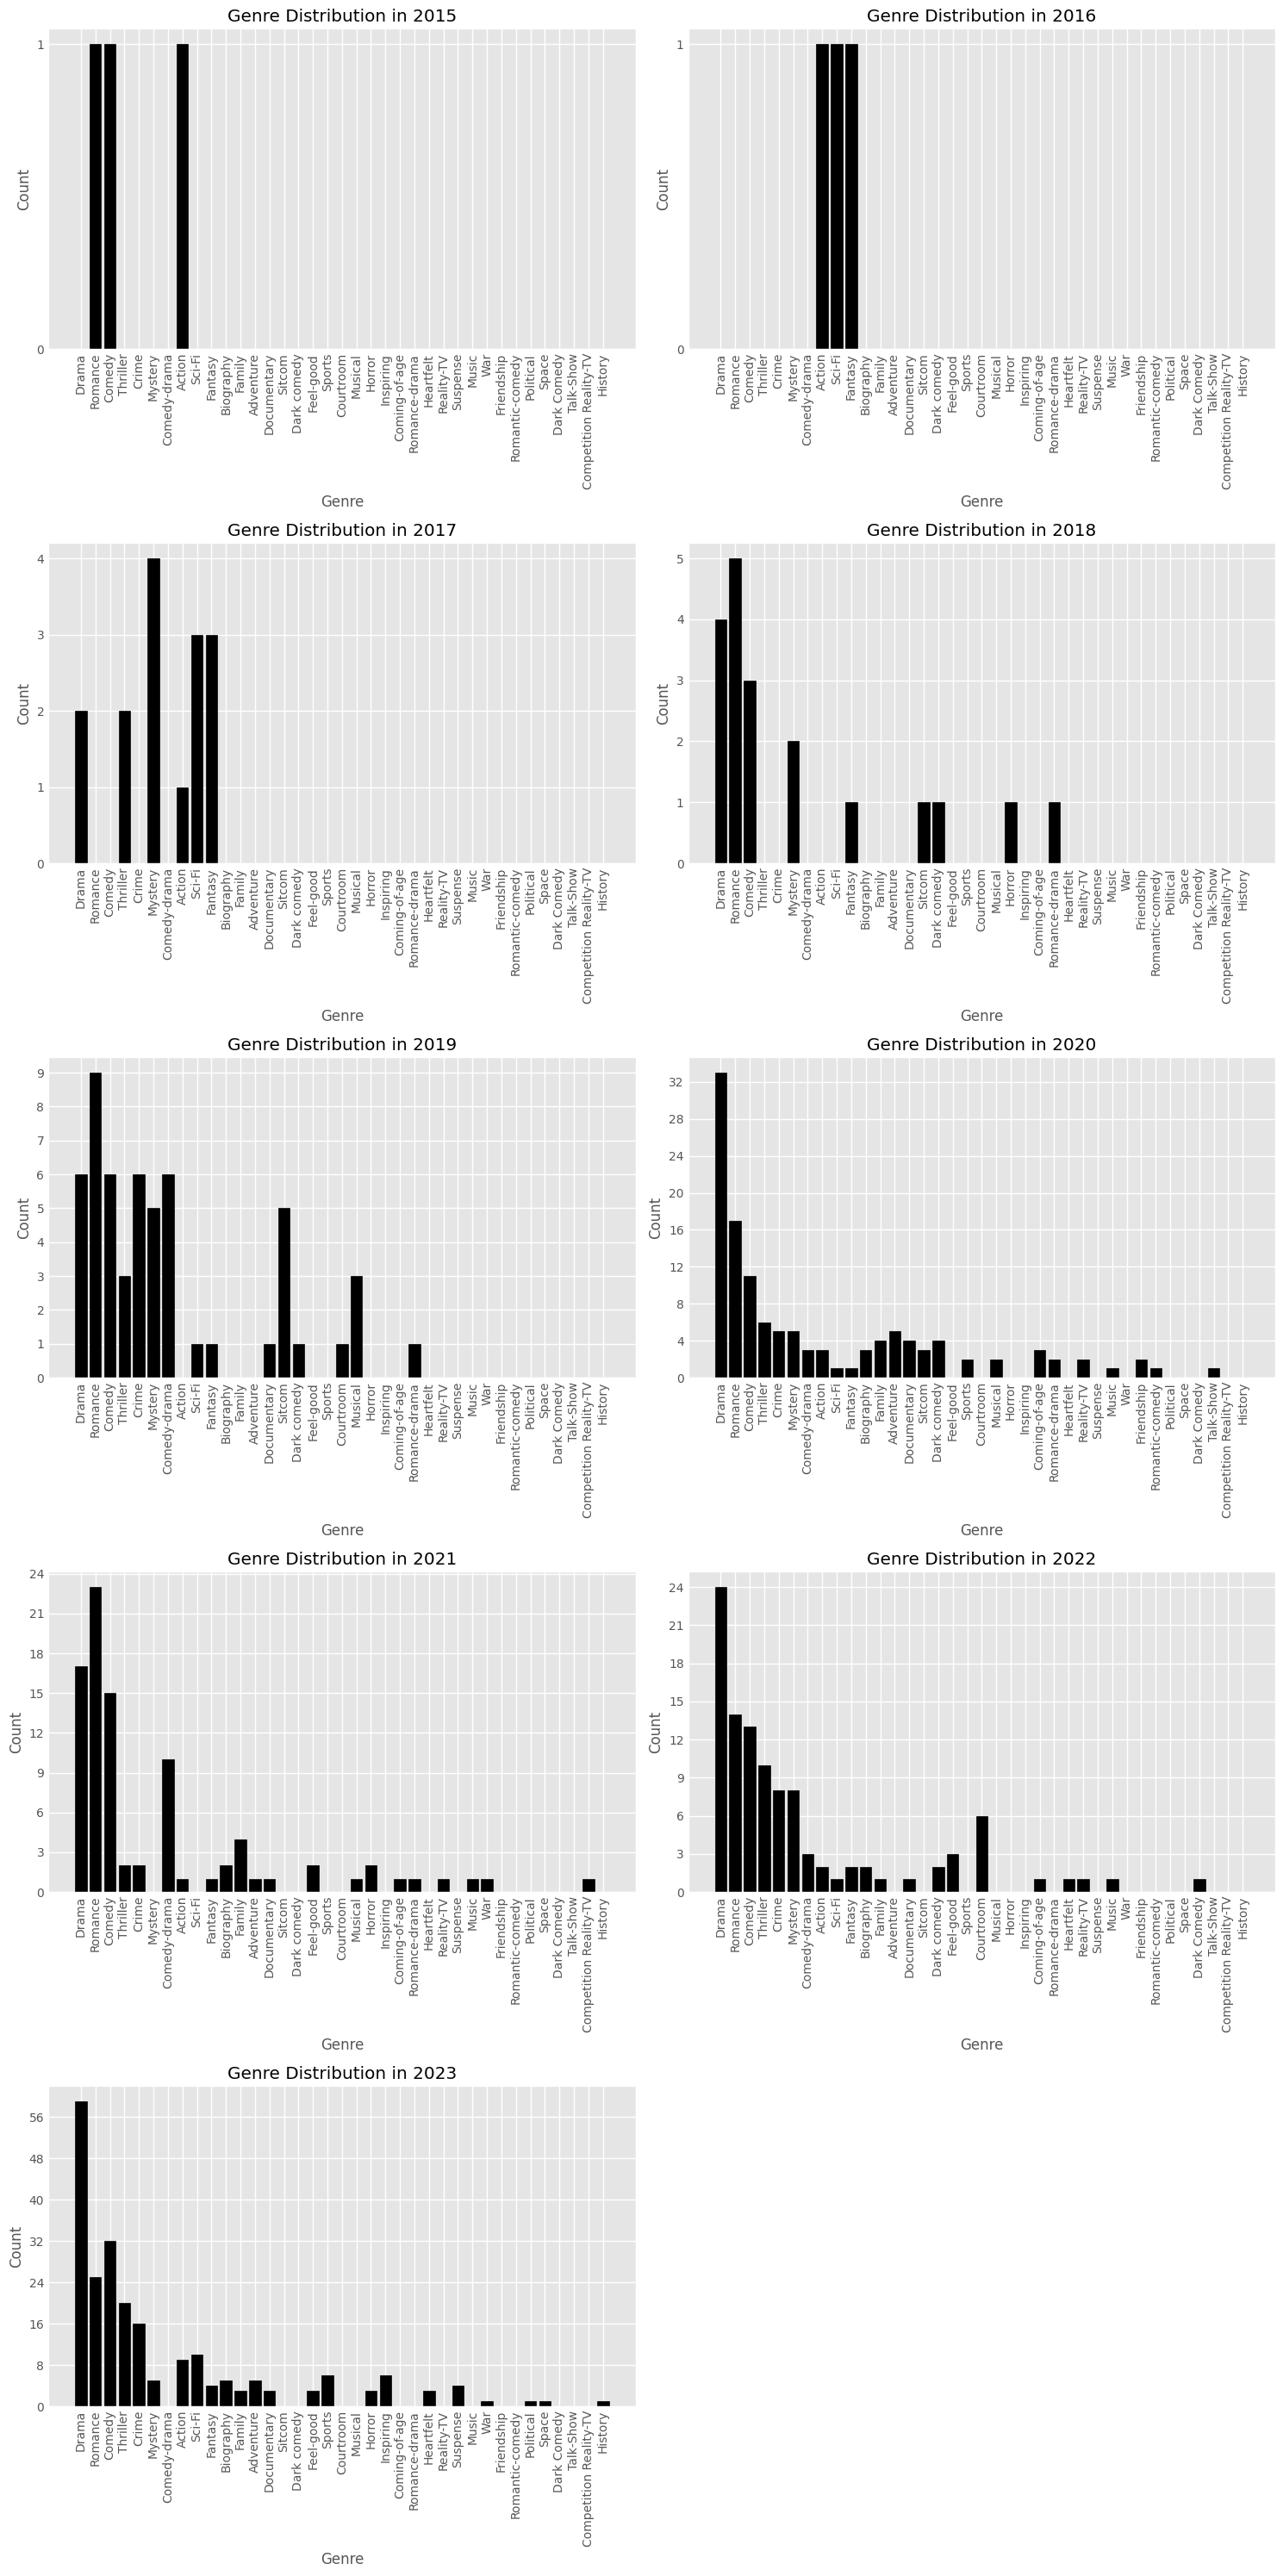

In [24]:
genre_counts = []
for index, row in df.iterrows():
    genres = row['Genre'].split(',')
    for genre in genres:
        genre = genre.strip()  # Remove leading/trailing spaces
        genre_counts.append({'Year': row['Watch Year'], 'Genre': genre})

genre_df = pd.DataFrame(genre_counts)


genre_year_counts = genre_df.groupby(['Year', 'Genre']).size().reset_index(name='Count')

pivot_data = genre_year_counts.pivot(index='Year', columns='Genre', values='Count').fillna(0)

top_genres = pivot_data.sum().sort_values(ascending=False).head(50).index
pivot_data = pivot_data[top_genres]

plt.style.use('ggplot')
#plt.rcParams['axes.facecolor'] = 'white'
graphs_per_row = 2

# Calculate the number of rows needed
num_rows = (len(pivot_data.index) + graphs_per_row - 1) // graphs_per_row

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=graphs_per_row, figsize=(15, 6 * num_rows))  # Adjust figsize as needed

# Iterate through years
for idx, year in enumerate(pivot_data.index):
    row_idx = idx // graphs_per_row
    col_idx = idx % graphs_per_row
    ax = axes[row_idx, col_idx]
    ax.bar(pivot_data.columns, pivot_data.loc[year], edgecolor='black', color='black')
    ax.set_title(f'Genre Distribution in {year}')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Count')
    ax.set_xticklabels(pivot_data.columns, rotation=90)
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))  # Set y-axis to display integers


for idx in range(len(pivot_data.index), num_rows * graphs_per_row):
    row_idx = idx // graphs_per_row
    col_idx = idx % graphs_per_row
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()